In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
import xgboost
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from sklearn.metrics import accuracy_score

In [2]:
x = np.load('X.npy')
Y = np.load('Y.npy')

x.shape

(2062, 64, 64)

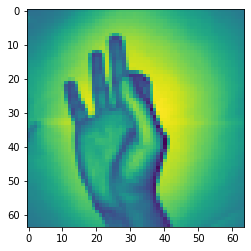

In [3]:
plt.imshow(x[0])

In [4]:
9-np.argmax(Y[0])
df = pd.DataFrame(Y)
df

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
X_flat = np.array(x).reshape((2062, 64*64))

X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [6]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20), random_state=1)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [7]:
y_hat = clf.predict(X_test)

print("accuracy: " + str(accuracy_score(y_test, y_hat)))

accuracy: 0.3360258481421648


In [8]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [9]:
d

292

In [10]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)

X_recovered = pca.inverse_transform(X_reduced)

In [11]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (1443, 292)
recovered shape: (1443, 4096)


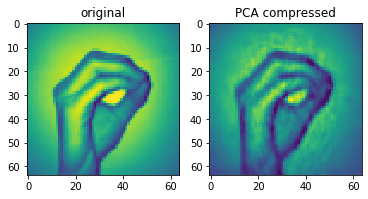

In [12]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2,2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

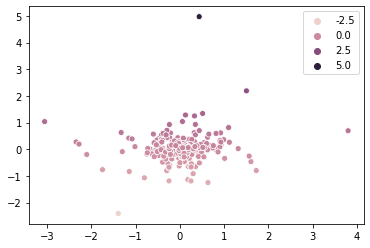

In [13]:
ax = sns.scatterplot(x=X_reduced[0], y=X_reduced[1],hue=X_reduced[1])

In [14]:
clf_reduced = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(20, 20, 20))
clf_reduced.fit(X_reduced, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [15]:
X_test_reduced = pca.transform(X_test)

y_hat_reduced = clf_reduced.predict(X_test_reduced)

print("accuracy: " + str(accuracy_score(y_test, y_hat_reduced)))

accuracy: 0.6494345718901454


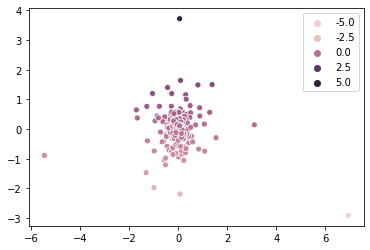

In [16]:
ax = sns.scatterplot(x=X_test_reduced[0], y=X_test_reduced[1],hue=X_test_reduced[1])

In [17]:
X_flat

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5294118 , 0.52156866,
        0.50980395],
       [0.59607846, 0.60784316, 0.61960787, ..., 0.3882353 , 0.38039216,
        0.37254903],
       [0.5882353 , 0.6039216 , 0.61960787, ..., 0.40392157, 0.4       ,
        0.3882353 ],
       ...,
       [0.5254902 , 0.54509807, 0.5568628 , ..., 0.47058824, 0.4627451 ,
        0.45490196],
       [0.5137255 , 0.5254902 , 0.5372549 , ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       [0.92941177, 0.9372549 , 0.9372549 , ..., 0.72156864, 0.73333335,
        0.67058825]], dtype=float32)

In [18]:
Ydf = DataFrame(data=Y, columns=[9-x for x in range(10)])
Ydf = Ydf[[x for x in range(10)]]
print(Ydf.columns)
print(Ydf.loc[0].idxmax())

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
9


In [19]:
Ydf[range(10)]

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2057,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2058,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
Ydf['class']='C' + (Ydf[range(10)].idxmax(axis=1)).astype('str')
Ydf[['class']]

,class
0,C9
1,C9
2,C9
3,C9
4,C9
...,...
2057,C0
2058,C0
2059,C0
2060,C0


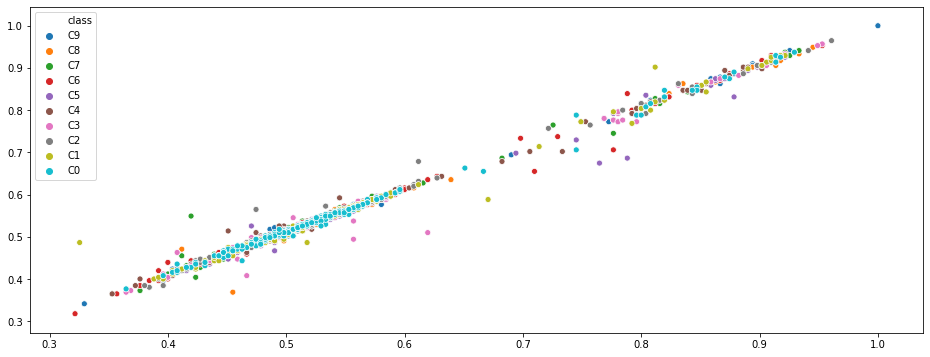

In [21]:
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x=X_flat[:,0], y=X_flat[:,1],hue=Ydf['class'])

In [22]:
tsne = TSNE(n_components=2)
X_tsne_reduced = tsne.fit_transform(X_flat)

In [23]:
X_tsne_reduced

array([[ -0.6386441, -46.81329  ],
       [-22.722076 ,  19.537657 ],
       [-34.333874 ,  28.864248 ],
       ...,
       [ 28.251682 , -15.840741 ],
       [-41.39853  , -25.163677 ],
       [  7.8527417,  81.746    ]], dtype=float32)

In [24]:
X_tsne_reduced.shape

(2062, 2)

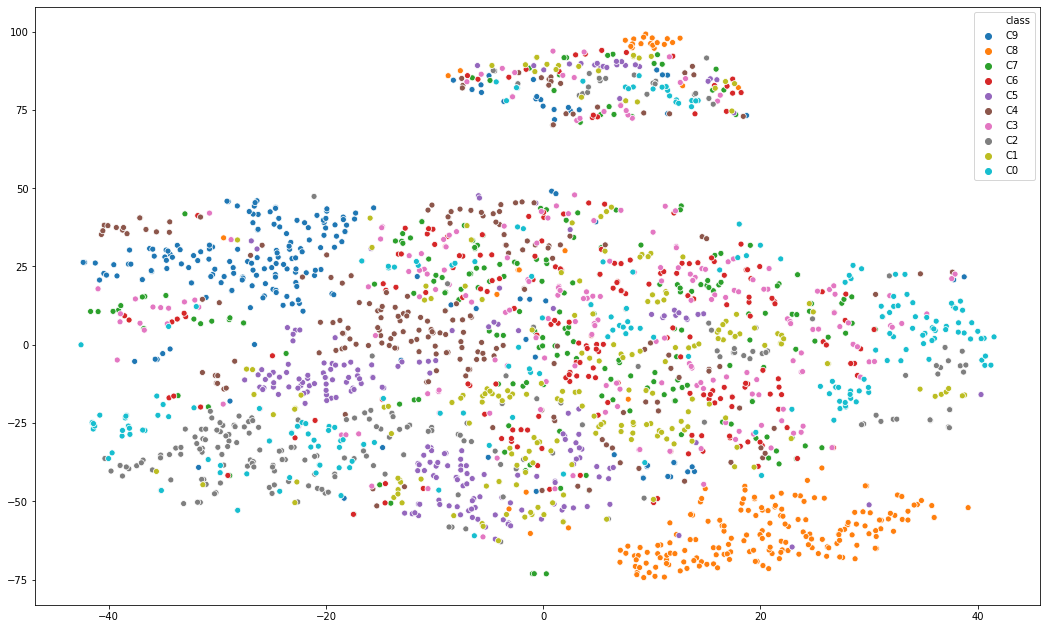

In [25]:
plt.figure(figsize=(18,11))
ax = sns.scatterplot(x=X_tsne_reduced[:,0], y=X_tsne_reduced[:,1],hue=Ydf['class'])

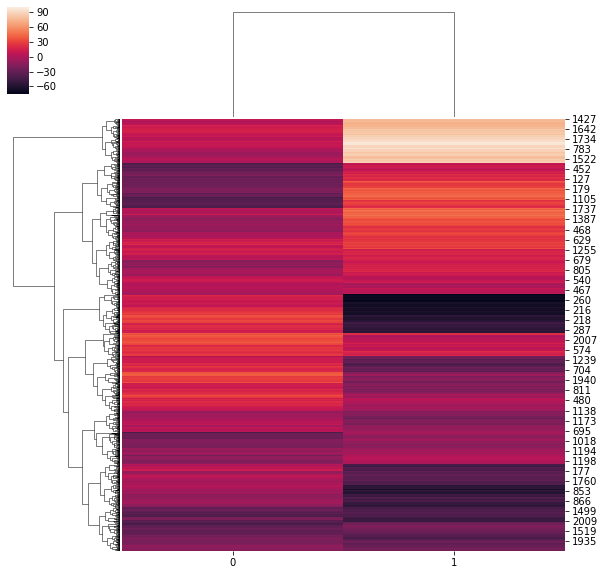

In [26]:
g = sns.clustermap(X_tsne_reduced)

In [27]:
x_flat = np.array(x).reshape((2062, 64*64))

In [28]:
Ydf = DataFrame(data=Y, columns =[9-x for x in range(10)])
Ydf = Ydf[[x for x in range(10)]]
Ydf['class']='C' +(Ydf[range(10)].idxmax(axis=1)).astype('str')
Ydf[['class']]
Y2 = Ydf[['class']].to_numpy()

In [29]:
Y2 = Y2.reshape(Y2.shape[0])

In [30]:
x_t, x_v, y_t, y_v = train_test_split(x_flat, Y2, test_size=0.3,random_state=42)

In [32]:
xgb = xgboost.XGBClassifier()

xgb.fit(x_t, y_t)
xgb_pred = xgb.predict(x_v)

In [33]:
accuracy_score(y_v, xgb_pred)

0.7431340872374798

In [34]:
pca_dims = PCA()
pca_dims.fit(x_t)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [35]:
d

292

In [36]:
pca = PCA(n_components=d)
X_pca_reduced = pca.fit_transform(x_t)
x_valid = pca.transform(x_v)

In [37]:
xgbpca = xgboost.XGBClassifier()

xgbpca.fit(X_pca_reduced, y_t)
xgbpca_pred = xgbpca.predict(x_valid)

In [38]:
accuracy_score(y_v, xgbpca_pred)

0.6688206785137318

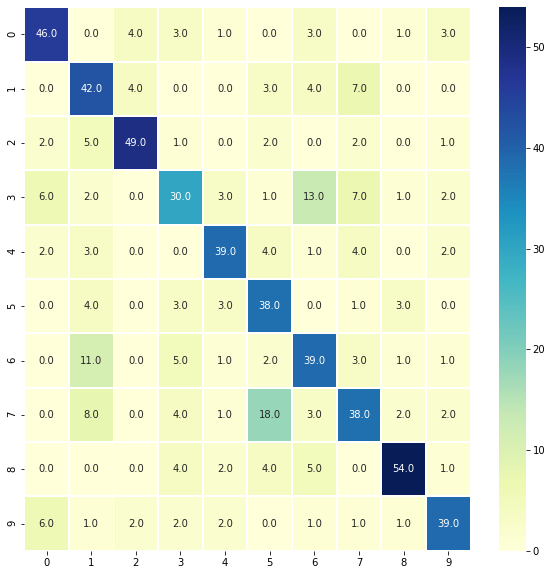

In [39]:
plt.figure(figsize=(10,10))
conf = confusion_matrix(y_v,xgbpca_pred)
# df = DataFrame(data=conf)
ax = sns.heatmap(conf,fmt=".1f",annot=True, linewidths=.9,cmap="YlGnBu")
#pour regler le probléme de thuncat == !pip install matplotlib==3.1.0